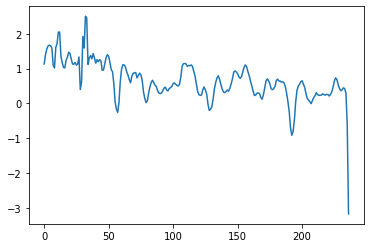

In [60]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import Traitement as tr
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

#Nous récupérons les données pour la france
data = pd.read_csv('data.csv', sep=';')
df_fra = data[data['LOCATION'] == "FRA"]
gpy, gpp, ind = tr.traitementParPays(df_fra, 'Q')
#Nous récupérons les valeurs des moyennes mobiles
data = pd.DataFrame(tr.mobilMoy(gpp,4)[0], columns=['id','date','valeur'])
data["valeur"].plot()
plt.show()

c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


predicted=0.278026, expected=0.250958
predicted=0.257527, expected=0.239126
predicted=0.239246, expected=0.259394
predicted=0.280944, expected=0.255180
predicted=0.303315, expected=0.214333
predicted=0.217177, expected=0.258603
predicted=0.296657, expected=0.331345
predicted=0.350122, expected=0.465280
predicted=0.577263, expected=0.643698
predicted=0.670890, expected=0.735601
predicted=0.733279, expected=0.684773
predicted=0.607809, expected=0.535700
predicted=0.431825, expected=0.429416
predicted=0.367012, expected=0.363736
predicted=0.362065, expected=0.389665
predicted=0.464807, expected=0.446788
predicted=0.446856, expected=0.426740
predicted=0.436208, expected=0.293662
predicted=0.248260, expected=-0.614682
predicted=-0.933463, expected=-3.174052
Test RMSE: 0.540


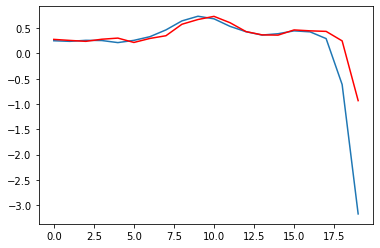

In [61]:
X = data['valeur']
train, test = X[1:len(X)-20], X[len(X)-20:]
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = list(history)
history = [history[i] for i in range(len(history))]
predictions = list()
test = list(test)
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Le test RMSE est faible, ce qui montre que le modèle est correcte